## 0. 데이터 정보 설명
[정보링크](https://dacon.io/competitions/official/235720/codeshare/2488?page=1&dtype=recent)

## site_info.csv - 발전소 정보
Id : 사이트 식별자  
Capacity : 발전소 발전용량(MW)  
Address : 주소  
InstallationAngle : 설치각(º)  
IncidentAngle : 입사각(º)  
Latitude : 위도  
Longitude : 경도  

## energy.csv - 발전소별 발전량
time : 1시간 단위 계량된 시간  
(ex-2018-03-01 1:00:00 => 2018-03-01 00:00:00 ~ 2018-03-01 1:00:00 1시간동안 발전량 계량)  
dangjin_floating : 당진수상태양광 발전량(KW)  
dangjin_warehouse : 당진자재창고태양광 발전량(KW)  
dangjin : 당진태양광 발전량(KW)  
ulsan : 울산태양광 발전량(KW)  

## dangjin_fcst_data.csv - 당진지역 발전소 동네 예보
Forecast time : 예보 발표 시점  
forecast : 예보 시간  
(ex - Forecast time:2018-03-01 11:00:00, forecast:4.0 => 2018-03-01 11:00:00에 발표한 2018-03-01 15:00:00 예보  

### 예보 발표 시점 'forecast'시간 후 기상 예보  

Temperature : 온도(℃)  
Humidity : 습도(%)  
WindSpeed : 풍속(m/s)  
WindDirection : 풍향(º)  
Cloud : 하늘상태(1-맑음, 2-구름보통, 3-구름많음, 4-흐림)  

In [1]:
import os
import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In D:\Anaconda\envs\data_engeneering\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In D:\Anaconda\envs\data_engeneering\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In D:\Anaconda\envs\data_engeneering\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In D:\Anaconda\envs\data_engeneering\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In D:\Anaconda\envs\data_engeneering\lib\site-packages\m

In [2]:
site_info = pd.read_csv('data/site_info.csv')              # 발전소 정보

In [3]:
site_info['Capacity'] = site_info['Capacity'] * 1000        # 발전용량의 단위를 MW -> KW로 변경
site_info['Capacity'] = site_info['Capacity'].astype(int)
site_info

,Id,Capacity,Address,InstallationAngle,IncidentAngle,Latitude,Longitude
0,당진수상태양광,1000,충남 당진시 석문면 교로길 30,30.0,30.0,37.050753,126.510299
1,당진자재창고태양광,700,충남 당진시 석문면 교로길 30,30.0,30.0,37.050753,126.510299
2,당진태양광,1000,충남 당진시 석문면 교로길 30,30.0,30.0,37.050753,126.510299
3,울산태양광,500,울산광역시 남구 용잠로 623,20.0,20.0,35.477651,129.380778


In [4]:
energy = pd.read_csv('data/energy.csv')                    # 발전소별 발전량
energy

,time,dangjin_floating,dangjin_warehouse,dangjin,ulsan
0,2018-03-01 1:00:00,0.0,0.0,0,0
1,2018-03-01 2:00:00,0.0,0.0,0,0
2,2018-03-01 3:00:00,0.0,0.0,0,0
3,2018-03-01 4:00:00,0.0,0.0,0,0
4,2018-03-01 5:00:00,0.0,0.0,0,0
...,...,...,...,...,...
25627,2021-01-31 20:00:00,0.0,0.0,0,0
25628,2021-01-31 21:00:00,0.0,0.0,0,0
25629,2021-01-31 22:00:00,0.0,0.0,0,0
25630,2021-01-31 23:00:00,0.0,0.0,0,0


In [5]:
energy.describe()

,dangjin_floating,dangjin_warehouse,dangjin,ulsan
count,25608.000000,25584.000000,25632.000000,25632.000000
mean,122.056311,92.476665,139.653285,64.159761
std,192.041585,146.423366,220.491387,101.020447
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,191.000000,145.000000,227.000000,101.000000
max,753.000000,593.000000,867.000000,392.000000


In [6]:
energy_na_floating = energy.loc[energy['dangjin_floating'].notna() == False]
energy_na_floating

,time,dangjin_floating,dangjin_warehouse,dangjin,ulsan
20352,2020-06-26 1:00:00,NaN,0.0,0,0
20353,2020-06-26 2:00:00,NaN,0.0,0,0
20354,2020-06-26 3:00:00,NaN,0.0,0,0
20355,2020-06-26 4:00:00,NaN,0.0,0,0
20356,2020-06-26 5:00:00,NaN,0.0,0,0
20357,2020-06-26 6:00:00,NaN,0.0,0,0
20358,2020-06-26 7:00:00,NaN,7.0,2,7
20359,2020-06-26 8:00:00,NaN,20.0,18,50
20360,2020-06-26 9:00:00,NaN,148.0,175,161
20361,2020-06-26 10:00:00,NaN,242.0,330,170


In [7]:
energy_na_warehouse = energy.loc[energy['dangjin_warehouse'].notna() == False]
energy_na_warehouse

,time,dangjin_floating,dangjin_warehouse,dangjin,ulsan
384,2018-03-17 1:00:00,0.0,NaN,0,0
385,2018-03-17 2:00:00,0.0,NaN,0,0
386,2018-03-17 3:00:00,0.0,NaN,0,0
387,2018-03-17 4:00:00,0.0,NaN,0,0
388,2018-03-17 5:00:00,0.0,NaN,0,0
389,2018-03-17 6:00:00,0.0,NaN,0,0
390,2018-03-17 7:00:00,0.0,NaN,0,0
391,2018-03-17 8:00:00,24.0,NaN,16,13
392,2018-03-17 9:00:00,162.0,NaN,177,57
393,2018-03-17 10:00:00,363.0,NaN,348,206


In [8]:
energy['date'] = energy['time'].str.split(' ').str[0]
energy['time'] = energy['time'].str.split(' ').str[1]
energy['time'] = energy['time'].str.rjust(8, '0')

energy.loc[energy['time']=='24:00:00', 'time'] = '00:00:00'
energy['time'] = energy['date'] + ' ' + energy['time']
energy['time'] = pd.to_datetime(energy['time'])
energy.loc[energy['time'].dt.hour == 0, 'time'] += datetime.timedelta(days = 1)

In [9]:
energy = energy[['time', 'dangjin_floating', 'dangjin_warehouse', 'dangjin', 'ulsan']]
energy

,time,dangjin_floating,dangjin_warehouse,dangjin,ulsan
0,2018-03-01 01:00:00,0.0,0.0,0,0
1,2018-03-01 02:00:00,0.0,0.0,0,0
2,2018-03-01 03:00:00,0.0,0.0,0,0
3,2018-03-01 04:00:00,0.0,0.0,0,0
4,2018-03-01 05:00:00,0.0,0.0,0,0
...,...,...,...,...,...
25627,2021-01-31 20:00:00,0.0,0.0,0,0
25628,2021-01-31 21:00:00,0.0,0.0,0,0
25629,2021-01-31 22:00:00,0.0,0.0,0,0
25630,2021-01-31 23:00:00,0.0,0.0,0,0


In [10]:
energy_floating = energy[['time', 'dangjin_floating']].copy()
capacity = int(site_info[site_info['Id'] == '당진수상태양광']['Capacity'])
energy_floating['capacity'] = capacity
energy_floating['time_generation'] = energy_floating['dangjin_floating'] / energy_floating['capacity']

energy_floating.info()
energy_floating

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25632 entries, 0 to 25631
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   time              25632 non-null  datetime64[ns]
 1   dangjin_floating  25608 non-null  float64       
 2   capacity          25632 non-null  int64         
 3   time_generation   25608 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 801.1 KB


,time,dangjin_floating,capacity,time_generation
0,2018-03-01 01:00:00,0.0,1000,0.0
1,2018-03-01 02:00:00,0.0,1000,0.0
2,2018-03-01 03:00:00,0.0,1000,0.0
3,2018-03-01 04:00:00,0.0,1000,0.0
4,2018-03-01 05:00:00,0.0,1000,0.0
...,...,...,...,...
25627,2021-01-31 20:00:00,0.0,1000,0.0
25628,2021-01-31 21:00:00,0.0,1000,0.0
25629,2021-01-31 22:00:00,0.0,1000,0.0
25630,2021-01-31 23:00:00,0.0,1000,0.0


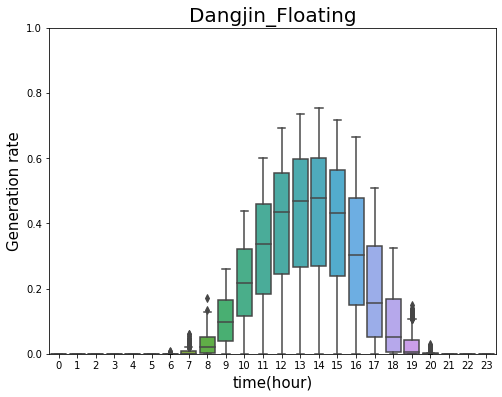

In [11]:
plt.figure(figsize=(8, 6))
plt.ylim([0, 1])
ax = sns.boxplot(x=energy_floating['time'].dt.hour, y=energy_floating['time_generation'])
ax.set_title('Dangjin_Floating', fontsize=20)
ax.set_xlabel('time(hour)', fontsize = 15)
ax.set_ylabel('Generation rate', fontsize = 15)
plt.show()

In [12]:
energy_warehouse = energy[['time', 'dangjin_warehouse']].copy()
capacity = int(site_info[site_info['Id'] == '당진자재창고태양광']['Capacity'])
energy_warehouse['capacity'] = capacity
energy_warehouse['time_generation'] = energy_warehouse['dangjin_warehouse'] / energy_warehouse['capacity']

energy_warehouse.info()
energy_warehouse

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25632 entries, 0 to 25631
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   time               25632 non-null  datetime64[ns]
 1   dangjin_warehouse  25584 non-null  float64       
 2   capacity           25632 non-null  int64         
 3   time_generation    25584 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 801.1 KB


,time,dangjin_warehouse,capacity,time_generation
0,2018-03-01 01:00:00,0.0,700,0.0
1,2018-03-01 02:00:00,0.0,700,0.0
2,2018-03-01 03:00:00,0.0,700,0.0
3,2018-03-01 04:00:00,0.0,700,0.0
4,2018-03-01 05:00:00,0.0,700,0.0
...,...,...,...,...
25627,2021-01-31 20:00:00,0.0,700,0.0
25628,2021-01-31 21:00:00,0.0,700,0.0
25629,2021-01-31 22:00:00,0.0,700,0.0
25630,2021-01-31 23:00:00,0.0,700,0.0


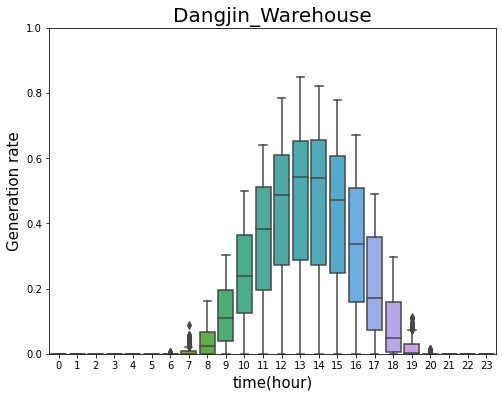

In [13]:
plt.figure(figsize=(8, 6))
plt.ylim([0, 1])
ax = sns.boxplot(x=energy_warehouse['time'].dt.hour, y=energy_warehouse['time_generation'])
ax.set_title('Dangjin_Warehouse', fontsize=20)
ax.set_xlabel('time(hour)', fontsize = 15)
ax.set_ylabel('Generation rate', fontsize = 15)
plt.show()

In [14]:
energy_dangjin = energy[['time', 'dangjin']].copy()
capacity = int(site_info[site_info['Id'] == '당진태양광']['Capacity'])
energy_dangjin['capacity'] = capacity
energy_dangjin['time_generation'] = energy_dangjin['dangjin'] / energy_dangjin['capacity']

energy_dangjin.info()
energy_dangjin

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25632 entries, 0 to 25631
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   time             25632 non-null  datetime64[ns]
 1   dangjin          25632 non-null  int64         
 2   capacity         25632 non-null  int64         
 3   time_generation  25632 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 801.1 KB


,time,dangjin,capacity,time_generation
0,2018-03-01 01:00:00,0,1000,0.0
1,2018-03-01 02:00:00,0,1000,0.0
2,2018-03-01 03:00:00,0,1000,0.0
3,2018-03-01 04:00:00,0,1000,0.0
4,2018-03-01 05:00:00,0,1000,0.0
...,...,...,...,...
25627,2021-01-31 20:00:00,0,1000,0.0
25628,2021-01-31 21:00:00,0,1000,0.0
25629,2021-01-31 22:00:00,0,1000,0.0
25630,2021-01-31 23:00:00,0,1000,0.0


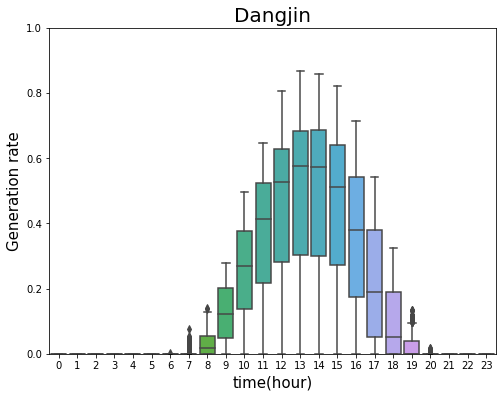

In [15]:
plt.figure(figsize=(8, 6))
plt.ylim([0, 1])
ax = sns.boxplot(x=energy_dangjin['time'].dt.hour, y=energy_dangjin['time_generation'])
ax.set_title('Dangjin', fontsize=20)
ax.set_xlabel('time(hour)', fontsize = 15)
ax.set_ylabel('Generation rate', fontsize = 15)
plt.show()

In [16]:
energy_ulsan = energy[['time', 'ulsan']].copy()
capacity = int(site_info[site_info['Id'] == '울산태양광']['Capacity'])
energy_ulsan['capacity'] = capacity
energy_ulsan['time_generation'] = energy_ulsan['ulsan'] / energy_ulsan['capacity']

energy_ulsan.info()
energy_ulsan

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25632 entries, 0 to 25631
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   time             25632 non-null  datetime64[ns]
 1   ulsan            25632 non-null  int64         
 2   capacity         25632 non-null  int64         
 3   time_generation  25632 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 801.1 KB


,time,ulsan,capacity,time_generation
0,2018-03-01 01:00:00,0,500,0.0
1,2018-03-01 02:00:00,0,500,0.0
2,2018-03-01 03:00:00,0,500,0.0
3,2018-03-01 04:00:00,0,500,0.0
4,2018-03-01 05:00:00,0,500,0.0
...,...,...,...,...
25627,2021-01-31 20:00:00,0,500,0.0
25628,2021-01-31 21:00:00,0,500,0.0
25629,2021-01-31 22:00:00,0,500,0.0
25630,2021-01-31 23:00:00,0,500,0.0


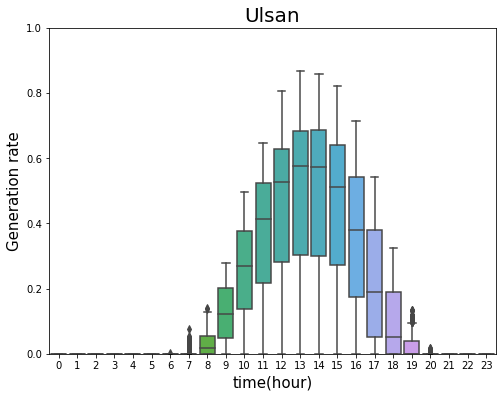

In [17]:
plt.figure(figsize=(8, 6))
plt.ylim([0, 1])
ax = sns.boxplot(x=energy_ulsan['time'].dt.hour, y=energy_dangjin['time_generation'])
ax.set_title('Ulsan', fontsize=20)
ax.set_xlabel('time(hour)', fontsize = 15)
ax.set_ylabel('Generation rate', fontsize = 15)
plt.show()

In [18]:
dangjin_fcst = pd.read_csv('data/dangjin_fcst_data.csv')   # 당진지역 발전소 동네 예보
dangjin_fcst['Forecast time'] = pd.to_datetime(dangjin_fcst['Forecast time'])

In [19]:
d_fcst_14 = dangjin_fcst[dangjin_fcst['Forecast time'].dt.hour==14].copy()
d_fcst_14 = d_fcst_14[(d_fcst_14['forecast'] >= 10) & (d_fcst_14['forecast'] <= 33)]    # 다음날의 00시 ~ 23시

d_fcst_14['Forecast_time'] = d_fcst_14['Forecast time'] + d_fcst_14['forecast'].map(lambda x:pd.DateOffset(hours=x))
d_fcst_14 = d_fcst_14[['Forecast_time', 'Temperature', 'Humidity', 'WindSpeed', 'WindDirection', 'Cloud']]

D:\Anaconda\envs\data_engeneering\lib\site-packages\pandas\core\arrays\datetimelike.py:1111: PerformanceWarning: Adding/subtracting object-dtype array to DatetimeArray not vectorized
  PerformanceWarning,


In [20]:
d_fcst_14_ = pd.DataFrame()
d_fcst_14_['Forecast_time'] = pd.date_range(start='2018-03-02 00:00:00', end='2021-03-01 23:00:00', freq='h')
d_fcst_14_ = pd.merge(d_fcst_14_, d_fcst_14, on='Forecast_time', how='outer')
d_fcst_14_

,Forecast_time,Temperature,Humidity,WindSpeed,WindDirection,Cloud
0,2018-03-02 00:00:00,-2.0,55.0,6.7,336.0,1.0
1,2018-03-02 01:00:00,NaN,NaN,NaN,NaN,NaN
2,2018-03-02 02:00:00,NaN,NaN,NaN,NaN,NaN
3,2018-03-02 03:00:00,-4.0,55.0,5.5,339.0,1.0
4,2018-03-02 04:00:00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
26299,2021-03-01 19:00:00,NaN,NaN,NaN,NaN,NaN
26300,2021-03-01 20:00:00,NaN,NaN,NaN,NaN,NaN
26301,2021-03-01 21:00:00,5.0,85.0,5.9,27.0,4.0
26302,2021-03-01 22:00:00,NaN,NaN,NaN,NaN,NaN


In [21]:
inter_d_fcst_14 = d_fcst_14_.interpolate()      # 결측치 보간
inter_d_fcst_14

,Forecast_time,Temperature,Humidity,WindSpeed,WindDirection,Cloud
0,2018-03-02 00:00:00,-2.000000,55.000000,6.7,336.000000,1.0
1,2018-03-02 01:00:00,-2.666667,55.000000,6.3,337.000000,1.0
2,2018-03-02 02:00:00,-3.333333,55.000000,5.9,338.000000,1.0
3,2018-03-02 03:00:00,-4.000000,55.000000,5.5,339.000000,1.0
4,2018-03-02 04:00:00,-4.333333,56.666667,5.1,340.666667,1.0
...,...,...,...,...,...,...
26299,2021-03-01 19:00:00,6.333333,85.000000,6.3,31.666667,4.0
26300,2021-03-01 20:00:00,5.666667,85.000000,6.1,29.333333,4.0
26301,2021-03-01 21:00:00,5.000000,85.000000,5.9,27.000000,4.0
26302,2021-03-01 22:00:00,5.000000,85.000000,5.9,27.000000,4.0


In [22]:
inter_d_fcst_14['time'] = inter_d_fcst_14['Forecast_time']
energy_floating_ = pd.merge(energy_floating, inter_d_fcst_14, on='time', how='outer')
energy_floating_ = energy_floating_.loc[energy_floating_['time'].between('2018-03-02', '2021-03-02 00:00:00')]
#energy_floating_.drop(index=list(range(20352,20375+1)), inplace=True) # 결측치가 있는 행 날리기
energy_floating_.drop('Forecast_time', axis=1, inplace=True)
energy_floating_

,time,dangjin_floating,capacity,time_generation,Temperature,Humidity,WindSpeed,WindDirection,Cloud
23,2018-03-02 00:00:00,0.0,1000.0,0.0,-2.000000,55.000000,6.7,336.000000,1.0
24,2018-03-02 01:00:00,0.0,1000.0,0.0,-2.666667,55.000000,6.3,337.000000,1.0
25,2018-03-02 02:00:00,0.0,1000.0,0.0,-3.333333,55.000000,5.9,338.000000,1.0
26,2018-03-02 03:00:00,0.0,1000.0,0.0,-4.000000,55.000000,5.5,339.000000,1.0
27,2018-03-02 04:00:00,0.0,1000.0,0.0,-4.333333,56.666667,5.1,340.666667,1.0
...,...,...,...,...,...,...,...,...,...
26322,2021-03-01 19:00:00,NaN,NaN,NaN,6.333333,85.000000,6.3,31.666667,4.0
26323,2021-03-01 20:00:00,NaN,NaN,NaN,5.666667,85.000000,6.1,29.333333,4.0
26324,2021-03-01 21:00:00,NaN,NaN,NaN,5.000000,85.000000,5.9,27.000000,4.0
26325,2021-03-01 22:00:00,NaN,NaN,NaN,5.000000,85.000000,5.9,27.000000,4.0


In [23]:
energy_floating_.notna().sum()

time                26304
dangjin_floating    25585
capacity            25609
time_generation     25585
Temperature         26304
Humidity            26304
WindSpeed           26304
WindDirection       26304
Cloud               26304
dtype: int64

In [24]:
energy_floating_.to_csv("data/energy_floating.csv", index=False)

In [25]:
inter_d_fcst_14['time'] = inter_d_fcst_14['Forecast_time']
energy_warehouse_ = pd.merge(energy_warehouse, inter_d_fcst_14, on='time', how='outer')
energy_warehouse_ = energy_warehouse_.loc[energy_warehouse_['time'].between('2018-03-02', '2021-03-02 00:00:00')]
#energy_warehouse_.drop(index=list(range(384,431+1)), inplace=True) # 결측치가 있는 행 날리기
energy_warehouse_.drop('Forecast_time', axis=1, inplace=True)
energy_warehouse_

,time,dangjin_warehouse,capacity,time_generation,Temperature,Humidity,WindSpeed,WindDirection,Cloud
23,2018-03-02 00:00:00,0.0,700.0,0.0,-2.000000,55.000000,6.7,336.000000,1.0
24,2018-03-02 01:00:00,0.0,700.0,0.0,-2.666667,55.000000,6.3,337.000000,1.0
25,2018-03-02 02:00:00,0.0,700.0,0.0,-3.333333,55.000000,5.9,338.000000,1.0
26,2018-03-02 03:00:00,0.0,700.0,0.0,-4.000000,55.000000,5.5,339.000000,1.0
27,2018-03-02 04:00:00,0.0,700.0,0.0,-4.333333,56.666667,5.1,340.666667,1.0
...,...,...,...,...,...,...,...,...,...
26322,2021-03-01 19:00:00,NaN,NaN,NaN,6.333333,85.000000,6.3,31.666667,4.0
26323,2021-03-01 20:00:00,NaN,NaN,NaN,5.666667,85.000000,6.1,29.333333,4.0
26324,2021-03-01 21:00:00,NaN,NaN,NaN,5.000000,85.000000,5.9,27.000000,4.0
26325,2021-03-01 22:00:00,NaN,NaN,NaN,5.000000,85.000000,5.9,27.000000,4.0


In [26]:
energy_warehouse_.notna().sum()

time                 26304
dangjin_warehouse    25561
capacity             25609
time_generation      25561
Temperature          26304
Humidity             26304
WindSpeed            26304
WindDirection        26304
Cloud                26304
dtype: int64

In [27]:
energy_warehouse_.to_csv("data/energy_warehouse.csv", index=False)

In [28]:
inter_d_fcst_14['time'] = inter_d_fcst_14['Forecast_time']
energy_dangjin_ = pd.merge(energy_dangjin, inter_d_fcst_14, on='time', how='outer')
energy_dangjin_ = energy_dangjin_.loc[energy_dangjin_['time'].between('2018-03-02', '2021-03-02 00:00:00')]
energy_dangjin_.drop('Forecast_time', axis=1, inplace=True)
energy_dangjin_

,time,dangjin,capacity,time_generation,Temperature,Humidity,WindSpeed,WindDirection,Cloud
23,2018-03-02 00:00:00,0.0,1000.0,0.0,-2.000000,55.000000,6.7,336.000000,1.0
24,2018-03-02 01:00:00,0.0,1000.0,0.0,-2.666667,55.000000,6.3,337.000000,1.0
25,2018-03-02 02:00:00,0.0,1000.0,0.0,-3.333333,55.000000,5.9,338.000000,1.0
26,2018-03-02 03:00:00,0.0,1000.0,0.0,-4.000000,55.000000,5.5,339.000000,1.0
27,2018-03-02 04:00:00,0.0,1000.0,0.0,-4.333333,56.666667,5.1,340.666667,1.0
...,...,...,...,...,...,...,...,...,...
26322,2021-03-01 19:00:00,NaN,NaN,NaN,6.333333,85.000000,6.3,31.666667,4.0
26323,2021-03-01 20:00:00,NaN,NaN,NaN,5.666667,85.000000,6.1,29.333333,4.0
26324,2021-03-01 21:00:00,NaN,NaN,NaN,5.000000,85.000000,5.9,27.000000,4.0
26325,2021-03-01 22:00:00,NaN,NaN,NaN,5.000000,85.000000,5.9,27.000000,4.0


In [29]:
energy_dangjin_.to_csv("data/energy_dangjin.csv", index=False)

In [30]:
ulsan_fcst = pd.read_csv('data/ulsan_fcst_data.csv')   # 울산지역 발전소 동네 예보
ulsan_fcst['Forecast time'] = pd.to_datetime(ulsan_fcst['Forecast time'])

In [31]:
u_fcst_14 = ulsan_fcst[dangjin_fcst['Forecast time'].dt.hour==14].copy()
u_fcst_14 = u_fcst_14[(u_fcst_14['forecast'] >= 10) & (u_fcst_14['forecast'] <= 33)]    # 다음날의 00시 ~ 23시

u_fcst_14['Forecast_time'] = u_fcst_14['Forecast time'] + u_fcst_14['forecast'].map(lambda x:pd.DateOffset(hours=x))
u_fcst_14 = u_fcst_14[['Forecast_time', 'Temperature', 'Humidity', 'WindSpeed', 'WindDirection', 'Cloud']]

D:\Anaconda\envs\data_engeneering\lib\site-packages\pandas\core\arrays\datetimelike.py:1111: PerformanceWarning: Adding/subtracting object-dtype array to DatetimeArray not vectorized
  PerformanceWarning,


In [32]:
u_fcst_14_ = pd.DataFrame()
u_fcst_14_['Forecast_time'] = pd.date_range(start='2018-03-02 00:00:00', end='2021-03-01 23:00:00', freq='h')
u_fcst_14_ = pd.merge(u_fcst_14_, u_fcst_14, on='Forecast_time', how='outer')
u_fcst_14_

,Forecast_time,Temperature,Humidity,WindSpeed,WindDirection,Cloud
0,2018-03-02 00:00:00,0.0,40.0,1.5,318.0,2.0
1,2018-03-02 01:00:00,NaN,NaN,NaN,NaN,NaN
2,2018-03-02 02:00:00,NaN,NaN,NaN,NaN,NaN
3,2018-03-02 03:00:00,-1.0,45.0,1.8,308.0,2.0
4,2018-03-02 04:00:00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
26299,2021-03-01 19:00:00,NaN,NaN,NaN,NaN,NaN
26300,2021-03-01 20:00:00,NaN,NaN,NaN,NaN,NaN
26301,2021-03-01 21:00:00,14.0,80.0,6.7,15.0,4.0
26302,2021-03-01 22:00:00,NaN,NaN,NaN,NaN,NaN


In [33]:
inter_u_fcst_14 = u_fcst_14_.interpolate()      # 결측치 보간
inter_u_fcst_14

,Forecast_time,Temperature,Humidity,WindSpeed,WindDirection,Cloud
0,2018-03-02 00:00:00,0.000000,40.000000,1.500000,318.000000,2.000000
1,2018-03-02 01:00:00,-0.333333,41.666667,1.600000,314.666667,2.000000
2,2018-03-02 02:00:00,-0.666667,43.333333,1.700000,311.333333,2.000000
3,2018-03-02 03:00:00,-1.000000,45.000000,1.800000,308.000000,2.000000
4,2018-03-02 04:00:00,-1.333333,45.000000,1.766667,303.333333,1.666667
...,...,...,...,...,...,...
26299,2021-03-01 19:00:00,15.333333,80.000000,5.100000,31.000000,4.000000
26300,2021-03-01 20:00:00,14.666667,80.000000,5.900000,23.000000,4.000000
26301,2021-03-01 21:00:00,14.000000,80.000000,6.700000,15.000000,4.000000
26302,2021-03-01 22:00:00,14.000000,80.000000,6.700000,15.000000,4.000000


In [34]:
inter_u_fcst_14['time'] = inter_u_fcst_14['Forecast_time']
energy_ulsan_ = pd.merge(energy_ulsan, inter_u_fcst_14, on='time', how='outer')
energy_ulsan_ = energy_ulsan_.loc[energy_ulsan_['time'].between('2018-03-02', '2021-03-02 00:00:00')]
energy_ulsan_.drop('Forecast_time', axis=1, inplace=True)
energy_ulsan_

,time,ulsan,capacity,time_generation,Temperature,Humidity,WindSpeed,WindDirection,Cloud
23,2018-03-02 00:00:00,0.0,500.0,0.0,0.000000,40.000000,1.500000,318.000000,2.000000
24,2018-03-02 01:00:00,0.0,500.0,0.0,-0.333333,41.666667,1.600000,314.666667,2.000000
25,2018-03-02 02:00:00,0.0,500.0,0.0,-0.666667,43.333333,1.700000,311.333333,2.000000
26,2018-03-02 03:00:00,0.0,500.0,0.0,-1.000000,45.000000,1.800000,308.000000,2.000000
27,2018-03-02 04:00:00,0.0,500.0,0.0,-1.333333,45.000000,1.766667,303.333333,1.666667
...,...,...,...,...,...,...,...,...,...
26322,2021-03-01 19:00:00,NaN,NaN,NaN,15.333333,80.000000,5.100000,31.000000,4.000000
26323,2021-03-01 20:00:00,NaN,NaN,NaN,14.666667,80.000000,5.900000,23.000000,4.000000
26324,2021-03-01 21:00:00,NaN,NaN,NaN,14.000000,80.000000,6.700000,15.000000,4.000000
26325,2021-03-01 22:00:00,NaN,NaN,NaN,14.000000,80.000000,6.700000,15.000000,4.000000


In [35]:
energy_ulsan_.to_csv("data/energy_ulsan.csv", index=False)

In [36]:
energy_ulsan_.tail()

,time,ulsan,capacity,time_generation,Temperature,Humidity,WindSpeed,WindDirection,Cloud
26322,2021-03-01 19:00:00,NaN,NaN,NaN,15.333333,80.0,5.1,31.0,4.0
26323,2021-03-01 20:00:00,NaN,NaN,NaN,14.666667,80.0,5.9,23.0,4.0
26324,2021-03-01 21:00:00,NaN,NaN,NaN,14.000000,80.0,6.7,15.0,4.0
26325,2021-03-01 22:00:00,NaN,NaN,NaN,14.000000,80.0,6.7,15.0,4.0
26326,2021-03-01 23:00:00,NaN,NaN,NaN,14.000000,80.0,6.7,15.0,4.0
